In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scx = StandardScaler()

In [8]:
x_train = scx.fit_transform(x_train)
x_test = scx.fit_transform(x_test)

In [9]:
from sklearn.svm import SVC

In [10]:
svc = SVC(kernel='rbf')

In [12]:
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
predict = svc.predict(x_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(classification_report(y_test,predict))
print('\n')
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        80
           1       0.93      0.96      0.94        52

    accuracy                           0.95       132
   macro avg       0.95      0.96      0.95       132
weighted avg       0.96      0.95      0.95       132



[[76  4]
 [ 2 50]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


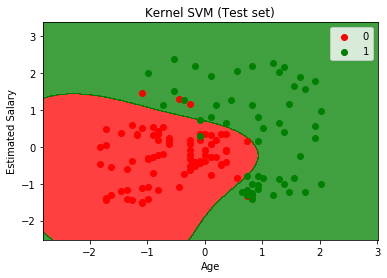

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()